In [1]:
import numpy as np
from keras.datasets import mnist

In [2]:
(X_train , _) ,(X_test, _) = mnist.load_data()
X_train.shape

(60000, 28, 28)

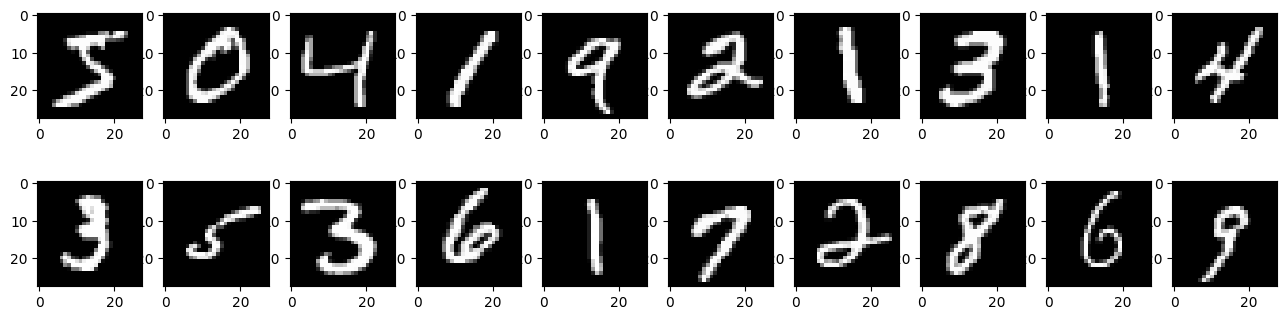

In [3]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2,10, figsize = (16, 4))

count = 0

for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train[count], cmap = 'gray')
        count+=1

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# prepare source data
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_test.shape)

In [6]:
X_train.shape


(60000, 28, 28)

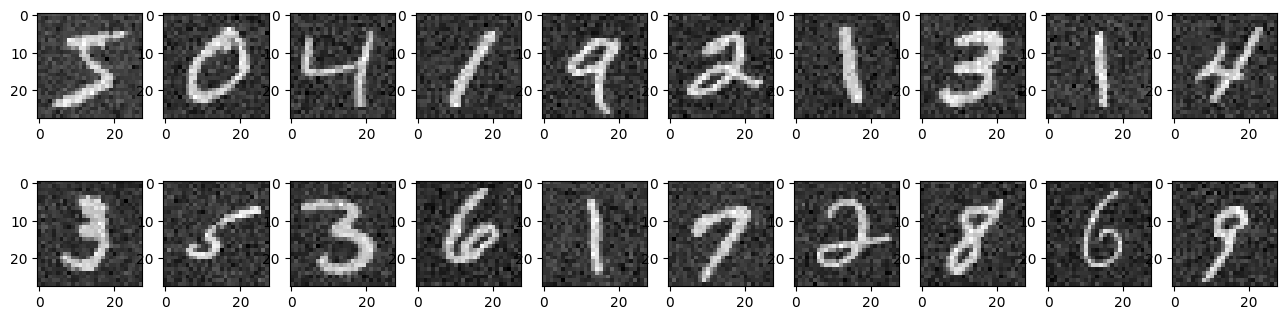

In [7]:
fig, axes = plt.subplots(2,10, figsize = (16,4))

count = 0
for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train_noise[count], cmap = 'gray')
        count+=1

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28 ,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28 ,28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28,28,1)

X_train.shape, X_train_noise.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [9]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

In [10]:
# encoder
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

In [11]:
# decoder
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [12]:
autoencoder = Model(encoder_input, decoded, name = 'Denoising_Model')
autoencoder.summary()

Model: "Denoising_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,865 (112.75 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 256 (1.00 KB)

In [13]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [16]:
checkpoint = ModelCheckpoint("denoising_model.h5", save_best_only=True, save_weights_only=False, verbose = 1)
history = autoencoder.fit(X_train_noise, X_train, batch_size = 128, epochs = 20, callbacks = checkpoint, validation_split = 0.25, verbose = 2)


Epoch 1/20

Epoch 1: val_loss improved from None to 0.06766, saving model to denoising_model.h5


352/352 - 26s - 73ms/step - loss: 0.0673 - val_loss: 0.0677
Epoch 2/20

Epoch 2: val_loss did not improve from 0.06766
352/352 - 23s - 67ms/step - loss: 0.0673 - val_loss: 0.0694
Epoch 3/20

Epoch 3: val_loss did not improve from 0.06766
352/352 - 25s - 71ms/step - loss: 0.0671 - val_loss: 0.0681
Epoch 4/20

Epoch 4: val_loss did not improve from 0.06766
352/352 - 25s - 70ms/step - loss: 0.0670 - val_loss: 0.0687
Epoch 5/20

Epoch 5: val_loss improved from 0.06766 to 0.06746, saving model to denoising_model.h5


352/352 - 24s - 68ms/step - loss: 0.0670 - val_loss: 0.0675
Epoch 6/20

Epoch 6: val_loss improved from 0.06746 to 0.06739, saving model to denoising_model.h5


352/352 - 27s - 75ms/step - loss: 0.0669 - val_loss: 0.0674
Epoch 7/20

Epoch 7: val_loss improved from 0.06739 to 0.06726, saving model to denoising_model.h5


352/352 - 24s - 69ms/step - loss: 0.0669 - val_loss: 0.0673
Epoch 8/20

Epoch 8: val_loss did not improve from 0.06726
352/352 - 26s - 74ms/step - loss: 0.0669 - val_loss: 0.0674
Epoch 9/20

Epoch 9: val_loss improved from 0.06726 to 0.06716, saving model to denoising_model.h5


352/352 - 25s - 72ms/step - loss: 0.0668 - val_loss: 0.0672
Epoch 10/20

Epoch 10: val_loss did not improve from 0.06716
352/352 - 25s - 72ms/step - loss: 0.0668 - val_loss: 0.0672
Epoch 11/20

Epoch 11: val_loss improved from 0.06716 to 0.06711, saving model to denoising_model.h5


352/352 - 27s - 77ms/step - loss: 0.0668 - val_loss: 0.0671
Epoch 12/20

Epoch 12: val_loss did not improve from 0.06711
352/352 - 24s - 69ms/step - loss: 0.0667 - val_loss: 0.0672
Epoch 13/20

Epoch 13: val_loss did not improve from 0.06711
352/352 - 28s - 80ms/step - loss: 0.0666 - val_loss: 0.0673
Epoch 14/20

Epoch 14: val_loss did not improve from 0.06711
352/352 - 25s - 71ms/step - loss: 0.0666 - val_loss: 0.0673
Epoch 15/20

Epoch 15: val_loss improved from 0.06711 to 0.06697, saving model to denoising_model.h5


352/352 - 39s - 111ms/step - loss: 0.0666 - val_loss: 0.0670
Epoch 16/20

Epoch 16: val_loss did not improve from 0.06697
352/352 - 34s - 96ms/step - loss: 0.0665 - val_loss: 0.0671
Epoch 17/20

Epoch 17: val_loss improved from 0.06697 to 0.06696, saving model to denoising_model.h5


352/352 - 27s - 77ms/step - loss: 0.0665 - val_loss: 0.0670
Epoch 18/20

Epoch 18: val_loss did not improve from 0.06696
352/352 - 24s - 69ms/step - loss: 0.0665 - val_loss: 0.0671
Epoch 19/20

Epoch 19: val_loss did not improve from 0.06696
352/352 - 26s - 75ms/step - loss: 0.0664 - val_loss: 0.0674
Epoch 20/20

Epoch 20: val_loss did not improve from 0.06696
352/352 - 27s - 76ms/step - loss: 0.0663 - val_loss: 0.0674


In [17]:
# load best performance model
from keras.models import load_model
autoencoder = load_model('denoising_model.h5')
autoencoder.summary()

Model: "Denoising_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,867 (112.77 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2 (12.00 B)

In [18]:
def visualize_data(data, row, column):
    data = data.reshape(data.shape[0], 28,28)
    count = 0
    fig, axes = plt.subplots(row, column, figsize = (16,4))
    for i in range(row):
        for j in range(column):
            axes[i,j].imshow(data[count], cmap = 'gray')
            count+=1

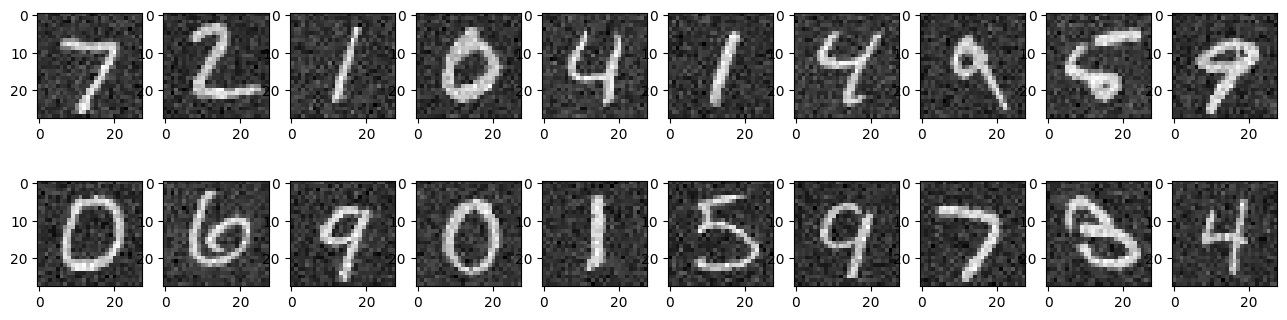

In [19]:
visualize_data(X_test_noise[:20], 2,10)


In [20]:
pred = autoencoder.predict(X_test_noise[:20])
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


(20, 28, 28, 1)

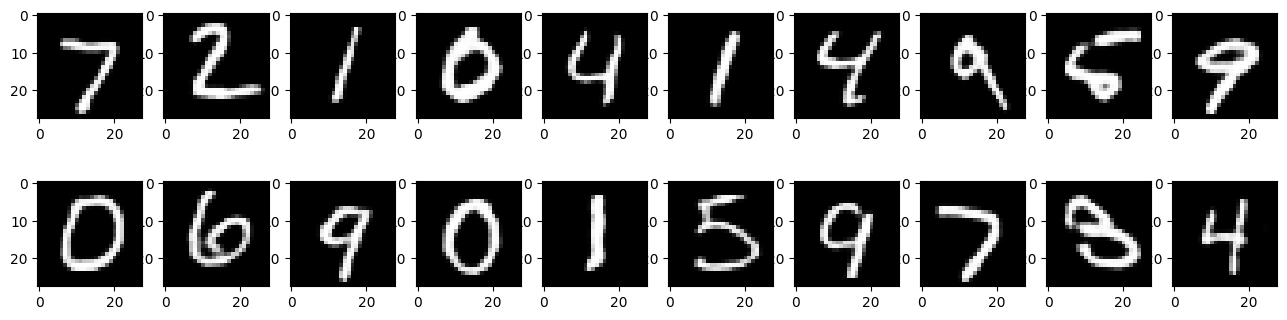

In [21]:
visualize_data(pred, 2, 10)
